# CPM to Storms Estimated Correlation with Python

This notebook uses Python to explain a hypothetical correlation between storms and ionization radiations, by using estimated data.

### Import necessary packages.

In [1]:
%matplotlib inline
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import cartopy
from IPython import display

### Create dataframes of data of storms and CPM logs.

In [2]:
df0 = pd.read_csv("https://lipy.us/data/Storms_data_USA_2001p.csv")
df0['Year'] = df0['ISO_TIME'].apply(lambda x: int(x.split("/")[2][:4]))
df0['Mon'] = df0['ISO_TIME'].apply(lambda x: int(x.split("/")[2][:4])+int(x.split("/")[1])/100)
df0['Lat'] = df0['LAT'].apply(lambda x: int(10*x)/10)
df0['Lon'] = df0['LON'].apply(lambda x: int(10*x)/10)
df0 = df0[['Year','Mon','Lat','Lon']]
df0x = df0.groupby(['Year','Lat','Lon']).count()
df0x = df0x.reset_index()
df0x.head()

,Year,Lat,Lon,Mon
0,2001,25.1,-85.7,1
1,2001,25.1,-85.5,1
2,2001,25.1,-64.2,1
3,2001,25.2,-85.5,1
4,2001,25.2,-85.3,1


In [3]:
df1 = pd.read_csv("https://lipy.us/data/Abnormal_CPM.csv")
df1['Year'] = df1['ISO_TIME'].apply(lambda x: int(x.split("/")[2][:4]))
df1['Mon'] = df1['ISO_TIME'].apply(lambda x: int(x.split("/")[2][:4])+int(x.split("/")[1])/100)
df1['Lat'] = df1['LAT'].apply(lambda x: int(10*x)/10)
df1['Lon'] = df1['LON'].apply(lambda x: int(10*x)/10)
df1 = df1[['Year','Mon','Lat','Lon']]
df1x = df1.groupby(['Year','Lat','Lon']).count()
df1x = df1x.reset_index()
df1x.head()

,Year,Lat,Lon,Mon
0,2001,24.9,-85.7,1
1,2001,25.0,-64.3,1
2,2001,25.1,-85.2,1
3,2001,25.1,-85.1,1
4,2001,25.2,-85.7,1


### Geomap storms and abnormal radiations.

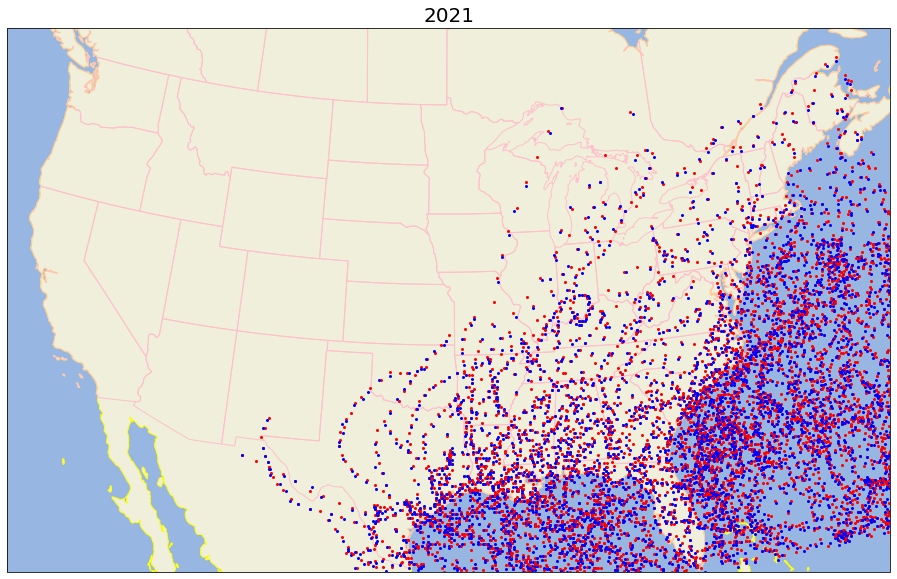

In [8]:
fig = plt.figure(figsize=(30, 10))
ext = [-120, -70, 23, 51]
ax = plt.axes(projection=cartopy.crs.AlbersEqualArea(np.mean(ext[:2]), np.mean(ext[2:])))
ax.set_extent(ext)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='yellow')
ax.add_feature(cartopy.feature.STATES, edgecolor='pink')

for iyr in range(2001, 2022):
    try:
        df0y = df0x[df0x['Year']==iyr]
        df1y = df1x[df1x['Year']==iyr]
        ax.plot(df0y.Lon,df0y.Lat,'ro',markersize=2,transform=cartopy.crs.Geodetic())
        ax.plot(df1y.Lon,df1y.Lat,'bo',markersize=2,transform=cartopy.crs.Geodetic())
        plt.title(iyr, fontsize=20)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    except KeyboardInterrupt:
        break

### Compute correlation between storms and abnormal radiations.

In [5]:
# Column-wise correlation computed in usual way:
corrC = df0.corrwith(df1, axis = 0)
corrC

Year    0.991477
Mon     0.991339
Lat    -0.002527
Lon    -0.002754
dtype: float64

In [6]:
# Row-wise correlation computed based on distance:
df2 = df0.merge(df1, on='Mon', how='inner')
df2.head()

,Year_x,Mon,Lat_x,Lon_x,Year_y,Lat_y,Lon_y
0,2001,2001.05,27.5,-95.0,2001,30.1,-96.0
1,2001,2001.05,27.5,-95.0,2001,29.1,-95.8
2,2001,2001.05,27.5,-95.0,2001,28.9,-95.5
3,2001,2001.05,27.5,-95.0,2001,27.4,-86.8
4,2001,2001.05,27.5,-95.0,2001,28.4,-86.4


In [7]:
df2['Disq'] = df2.apply(lambda R: (R[2]-R[5])**2 + (R[3]-R[6])**2, axis=1)
print("Distance  Correlation")
for q in range(10):
    df2x = df2[(df2['Disq'] < (q/10))]
    corrR = round(len(df2x)/len(df0), 2)
    print('{0}         {1}'.format(q, corrR))

Distance  Correlation
0         0.0
1         0.31
2         0.4
3         0.49
4         0.55
5         0.61
6         0.67
7         0.72
8         0.76
9         0.83


### Conclusions

Some storms are preceded by abnormal radiations in neighboring locations.